<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/EN3150_Emeralds_A03_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uncompress the .Z file using shell command
!uncompress faces.tar.Z  # This will create 'faces.tar'

In [ ]:
import tarfile
import os

# Path to the faces.tar file
tar_file_path = 'faces.tar'  # Update the path accordingly

# Extract the .tar file
with tarfile.open(tar_file_path, 'r') as tar_ref:
    tar_ref.extractall('faces')

# Confirm extraction
os.listdir('faces')

['faces']

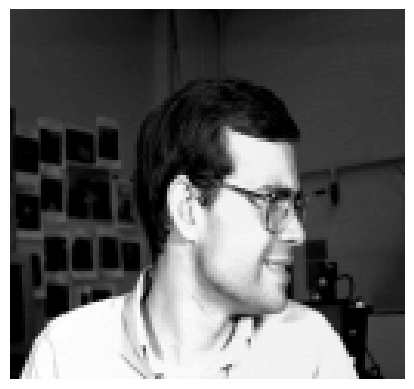

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to one of the folders with face images
folder_path = 'faces/faces/at33'  # Update this with one of the actual folders

# Load a .pgm image from the folder
img_path = os.path.join(folder_path, 'at33_left_angry_open.pgm')  # Update with a sample image file
img = Image.open(img_path)

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import numpy as np

img_num = np.array(img)
img_num.shape

(120, 128)

In [ ]:
import os

# Path to the folder
folder_path = 'faces/faces/at33'  # Update the path to your folder

# Count the number of files in the folder
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 96
